In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
raw_df = pd.read_csv('heart_disease_uci.csv')
display(raw_df.head(3))
display(raw_df.info())

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


None

# **Dealing with messy data**

In [108]:
# Quantos valores nulos temos em cada coluna
raw_df.isnull().sum() 

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [109]:
# Remove colunas com valores nulos
raw_df.dropna(how='any', axis=1).head(3)

,id,age,sex,dataset,cp,num
0,1,63,Male,Cleveland,typical angina,0
1,2,67,Male,Cleveland,asymptomatic,2
2,3,67,Male,Cleveland,asymptomatic,1


In [110]:
# Preenche valores nulos
raw_df.fillna('Not Given')

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,Not Given,Not Given,Not Given,1
916,917,62,Male,VA Long Beach,typical angina,Not Given,139.0,False,st-t abnormality,Not Given,Not Given,Not Given,Not Given,Not Given,Not Given,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,Not Given,Not Given,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,Not Given,385.0,True,lv hypertrophy,Not Given,Not Given,Not Given,Not Given,Not Given,Not Given,0


In [111]:
# ´Preenche valores nulos com a média
raw_df['thalch'].fillna(raw_df['thalch'].mean())

0      150.000000
1      108.000000
2      129.000000
3      187.000000
4      172.000000
          ...    
915    154.000000
916    137.545665
917    100.000000
918    137.545665
919     93.000000
Name: thalch, Length: 920, dtype: float64

In [112]:
# Dataframe com dados de cleveland
cleveland_df = raw_df[raw_df['dataset'] == 'Cleveland']
print(cleveland_df.shape)
display(cleveland_df.isnull().sum())

# Dataframe com dados de Hungary
hungary_df = raw_df[raw_df['dataset'] == 'Hungary']
print(hungary_df.shape)
display(hungary_df.isnull().sum())

# Dataframe com dados de Switzerland
switzerland_df = raw_df[raw_df['dataset'] == 'Switzerland']
print(switzerland_df.shape)
display(switzerland_df.isnull().sum())

# Dataframe com dados de Long Beach
long_beach_df = raw_df[raw_df['dataset'] == 'VA Long Beach']
print(long_beach_df.shape)
display(long_beach_df.isnull().sum())

(304, 16)


id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       1
ca          5
thal        3
num         0
dtype: int64

(293, 16)


id            0
age           0
sex           0
dataset       0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalch        1
exang         1
oldpeak       0
slope       189
ca          290
thal        265
num           0
dtype: int64

(123, 16)


id            0
age           0
sex           0
dataset       0
cp            0
trestbps      2
chol          0
fbs          75
restecg       1
thalch        1
exang         1
oldpeak       6
slope        17
ca          118
thal         52
num           0
dtype: int64

(200, 16)


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalch       53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
num           0
dtype: int64

In [113]:
# Para seguir com a análise, vamos remover as linhas com valores nulos
raw_df = raw_df.dropna().set_index('id')
raw_df

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,68,Male,Cleveland,asymptomatic,144.0,193.0,True,normal,141.0,False,3.4,flat,2.0,reversable defect,2
301,57,Male,Cleveland,asymptomatic,130.0,131.0,False,normal,115.0,True,1.2,flat,1.0,reversable defect,3
302,57,Female,Cleveland,atypical angina,130.0,236.0,False,lv hypertrophy,174.0,False,0.0,flat,1.0,normal,1


# **Creating Features**

In [114]:
# Get the columns to apply one-hot encoding
columns_to_encode = ['cp', 'restecg', 'slope', 'thal']

# Apply one-hot encoding to the selected columns
df_encoded = pd.get_dummies(raw_df, columns=columns_to_encode, drop_first=True)

df_encoded

,age,sex,dataset,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
id,,,,,,,,,,,,,,,,,,,,
1,63,Male,Cleveland,145.0,233.0,True,150.0,False,2.3,0.0,0,False,False,True,False,False,False,False,False,False
2,67,Male,Cleveland,160.0,286.0,False,108.0,True,1.5,3.0,2,False,False,False,False,False,True,False,True,False
3,67,Male,Cleveland,120.0,229.0,False,129.0,True,2.6,2.0,1,False,False,False,False,False,True,False,False,True
4,37,Male,Cleveland,130.0,250.0,False,187.0,False,3.5,0.0,0,False,True,False,True,False,False,False,True,False
5,41,Female,Cleveland,130.0,204.0,False,172.0,False,1.4,0.0,0,True,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,68,Male,Cleveland,144.0,193.0,True,141.0,False,3.4,2.0,2,False,False,False,True,False,True,False,False,True
301,57,Male,Cleveland,130.0,131.0,False,115.0,True,1.2,1.0,3,False,False,False,True,False,True,False,False,True
302,57,Female,Cleveland,130.0,236.0,False,174.0,False,0.0,1.0,1,True,False,False,False,False,True,False,True,False


In [115]:
# Aplica dummy encoding 
raw_df['sex'] = raw_df['sex'].replace('Male', 0).replace('Female', 1)
raw_df['fbs'] = raw_df['fbs'].replace(True, 1).replace(False, 0)
raw_df['exang'] = raw_df['exang'].replace(True, 1).replace(False, 0)

# Aplica one-hot encoding
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

cp_transformed = ohe.fit_transform(raw_df[['cp']])
restecg_transformed = ohe.fit_transform(raw_df[['restecg']])
slope_transformed = ohe.fit_transform(raw_df[['slope']])
thal_transformed = ohe.fit_transform(raw_df[['thal']])
ca_transformed = ohe.fit_transform(raw_df[['ca']])

# Concatena os dataframes
df = pd.concat([raw_df, cp_transformed, restecg_transformed, slope_transformed, thal_transformed, ca_transformed], axis=1).drop(['cp', 'restecg', 'slope', 'thal', 'dataset', 'ca'], axis=1).dropna()
df

C:\Users\felip\AppData\Local\Temp\ipykernel_24424\1307788924.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  raw_df['sex'] = raw_df['sex'].replace('Male', 0).replace('Female', 1)
C:\Users\felip\AppData\Local\Temp\ipykernel_24424\1307788924.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  raw_df['fbs'] = raw_df['fbs'].replace(True, 1).replace(False, 0)
C:\Users\felip\AppData\Local\Temp\ipykernel_24424\1307788924.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To r

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,num,cp_asymptomatic,...,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect,ca_0.0,ca_1.0,ca_2.0,ca_3.0
id,,,,,,,,,,,,,,,,,,,,,
1,63,0,145.0,233.0,1,150.0,0,2.3,0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,67,0,160.0,286.0,0,108.0,1,1.5,2,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,67,0,120.0,229.0,0,129.0,1,2.6,1,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,37,0,130.0,250.0,0,187.0,0,3.5,0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5,41,1,130.0,204.0,0,172.0,0,1.4,0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,68,0,144.0,193.0,1,141.0,0,3.4,2,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
301,57,0,130.0,131.0,0,115.0,1,1.2,3,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
302,57,1,130.0,236.0,0,174.0,0,0.0,1,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# **Conforming to Statistical Assumptions**

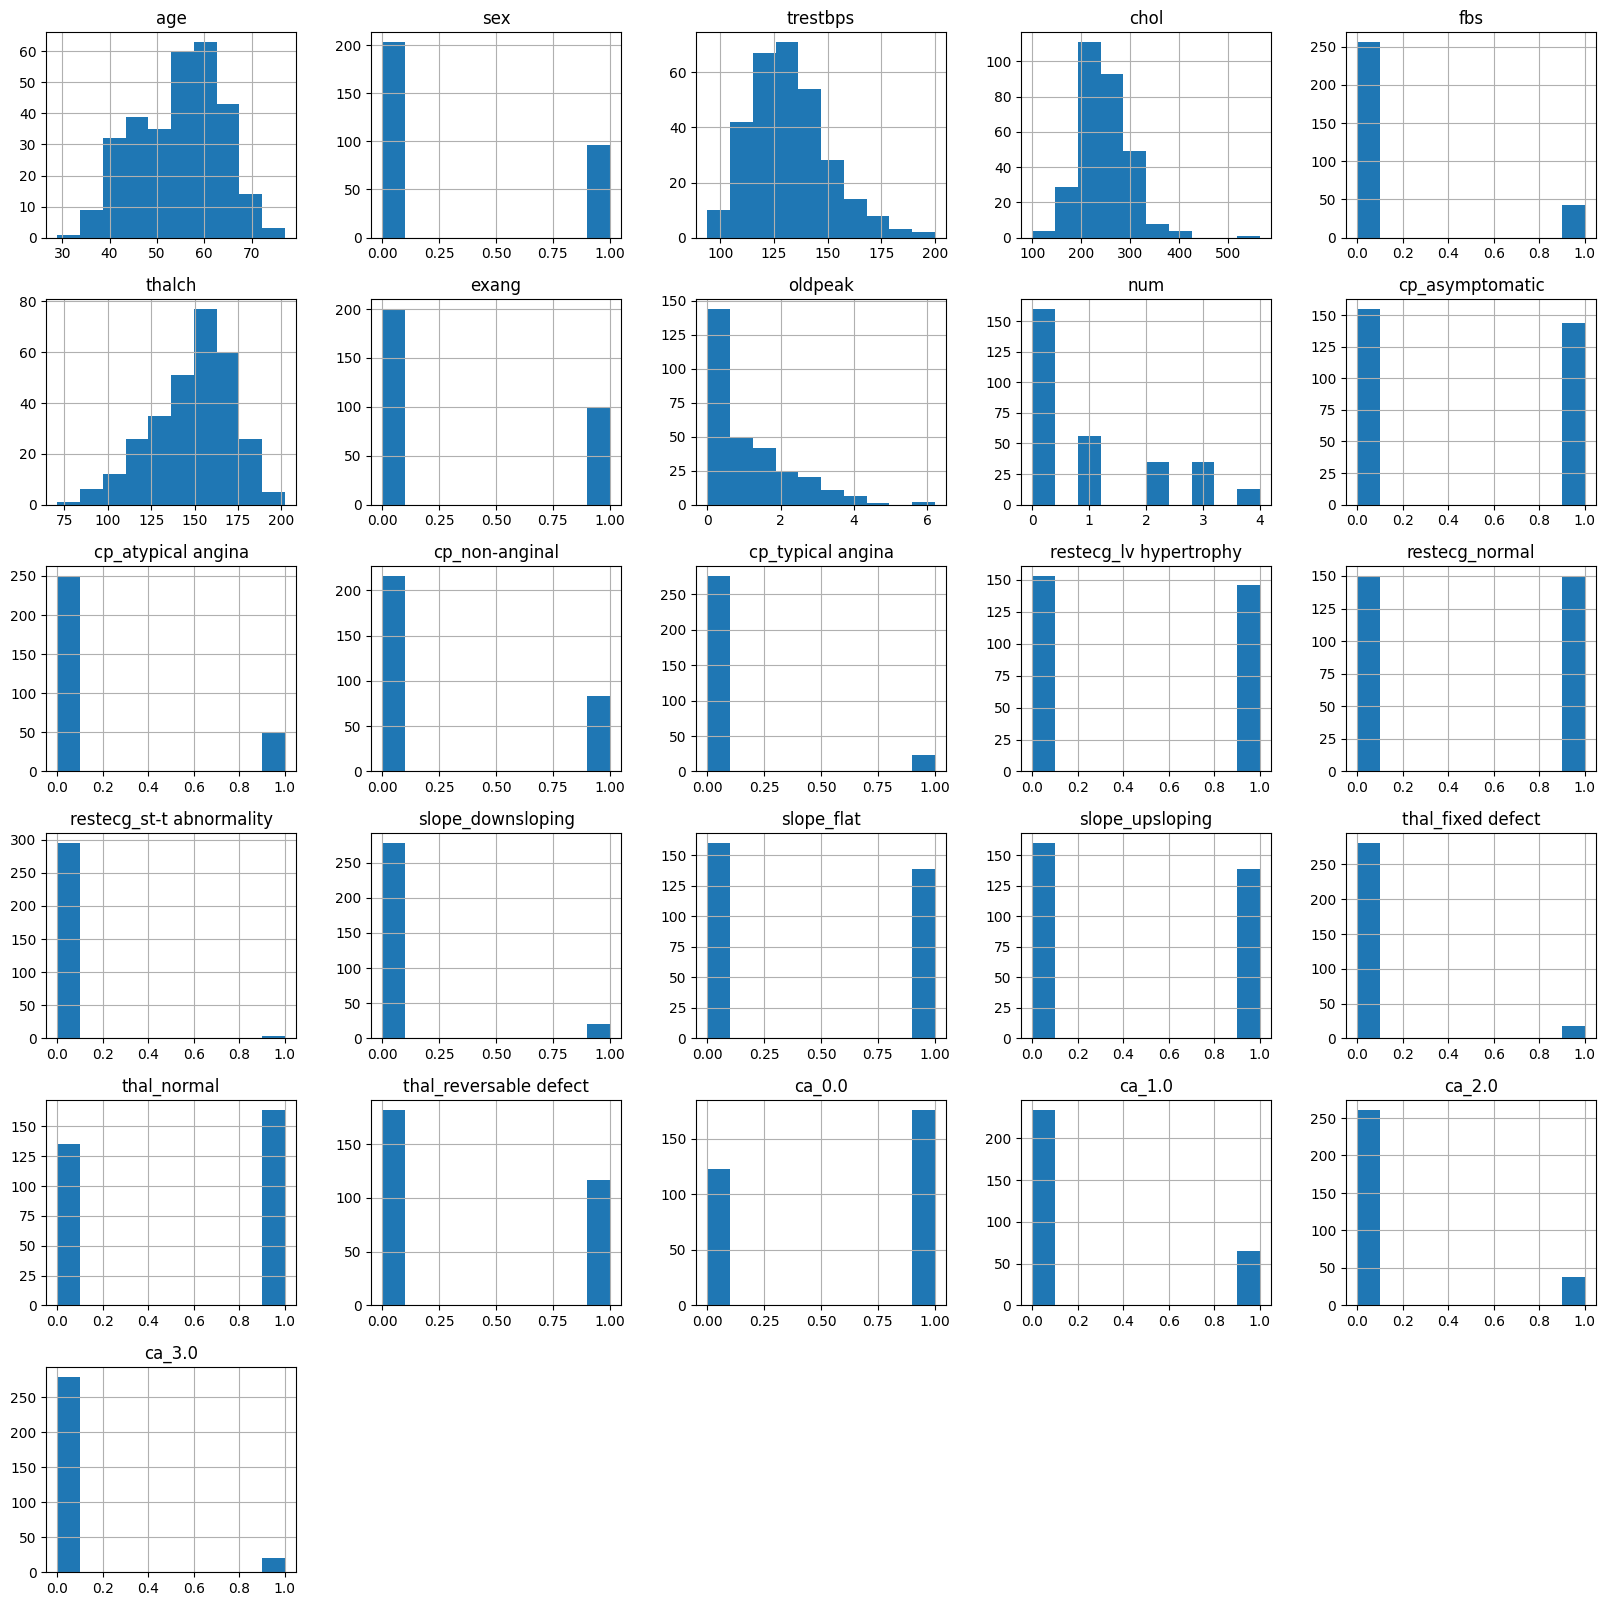

In [116]:
# Visualiza a distribuição dos dados usando histogramas
df.hist(figsize=(20, 20))
plt.show()

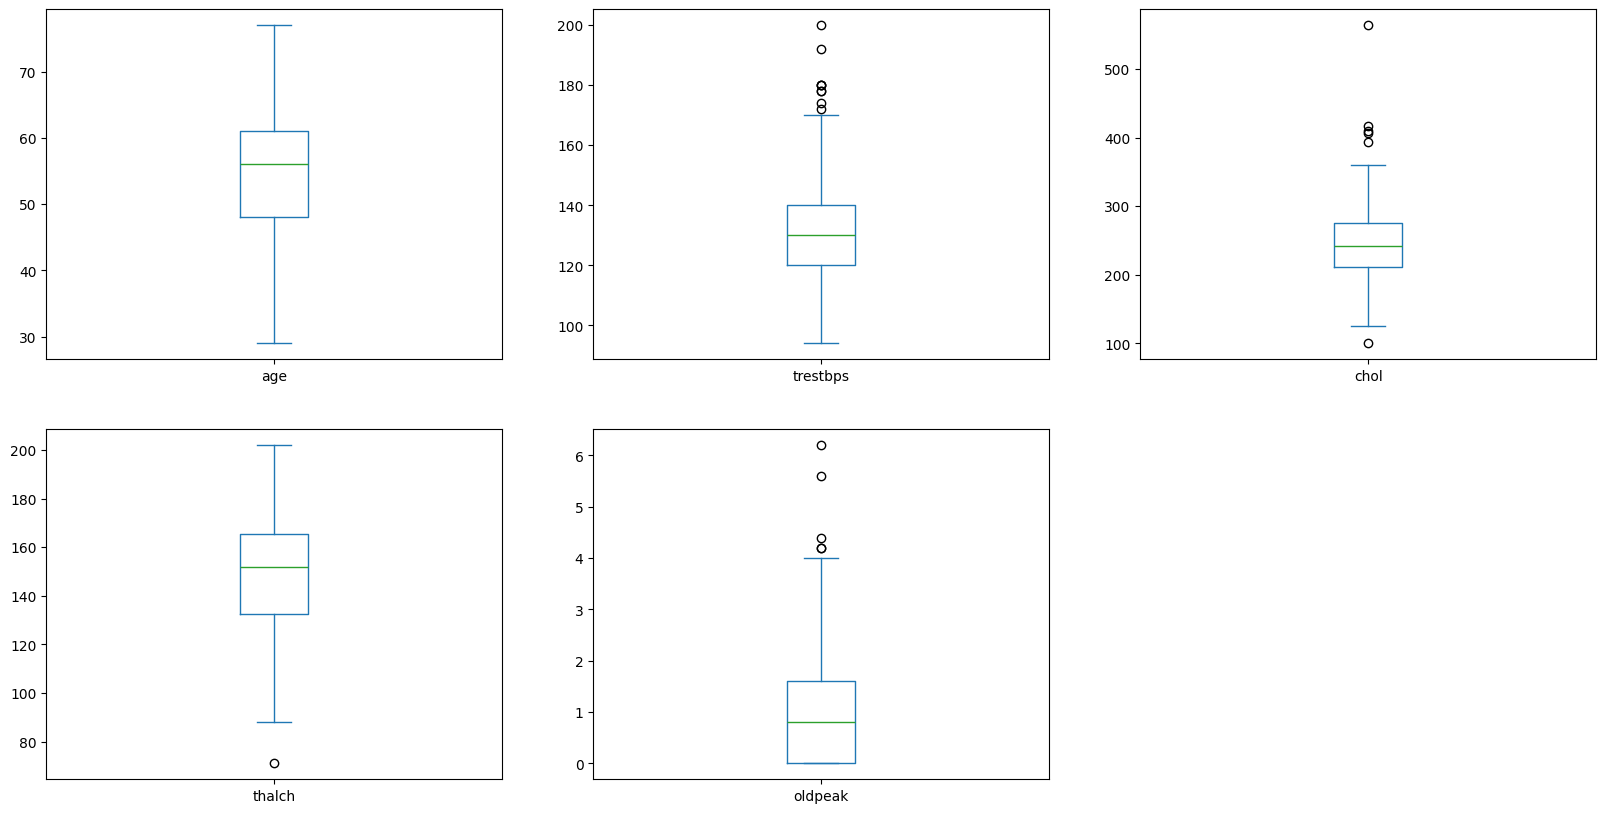

In [117]:
# Visualiza a distribuição dos dados usando boxplot
boxplot_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
df[boxplot_columns].plot(kind='box', subplots=True, layout=(2, 3), figsize=(20, 10))
plt.show()

In [118]:
# Função para remover outliers
def remove_outliers(df, column_name):
    # Calcula desvio padrão e média
    std = df[column_name].std()
    mean = df[column_name].mean()
    # Calcula o cutoff
    cut_off = std * 3
    lower, upper = mean - cut_off, mean + cut_off

    # Filtra o DataFrame removendo as linhas com outliers
    df_filtered = df[(df[column_name] > lower) & (df[column_name] < upper)]
    return df_filtered

# Remove outliers
df = remove_outliers(df, 'oldpeak')
df = remove_outliers(df, 'trestbps')
df = remove_outliers(df, 'chol')
df

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,num,cp_asymptomatic,...,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect,ca_0.0,ca_1.0,ca_2.0,ca_3.0
id,,,,,,,,,,,,,,,,,,,,,
1,63,0,145.0,233.0,1,150.0,0,2.3,0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,67,0,160.0,286.0,0,108.0,1,1.5,2,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,67,0,120.0,229.0,0,129.0,1,2.6,1,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,37,0,130.0,250.0,0,187.0,0,3.5,0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5,41,1,130.0,204.0,0,172.0,0,1.4,0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,68,0,144.0,193.0,1,141.0,0,3.4,2,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
301,57,0,130.0,131.0,0,115.0,1,1.2,3,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
302,57,1,130.0,236.0,0,174.0,0,0.0,1,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


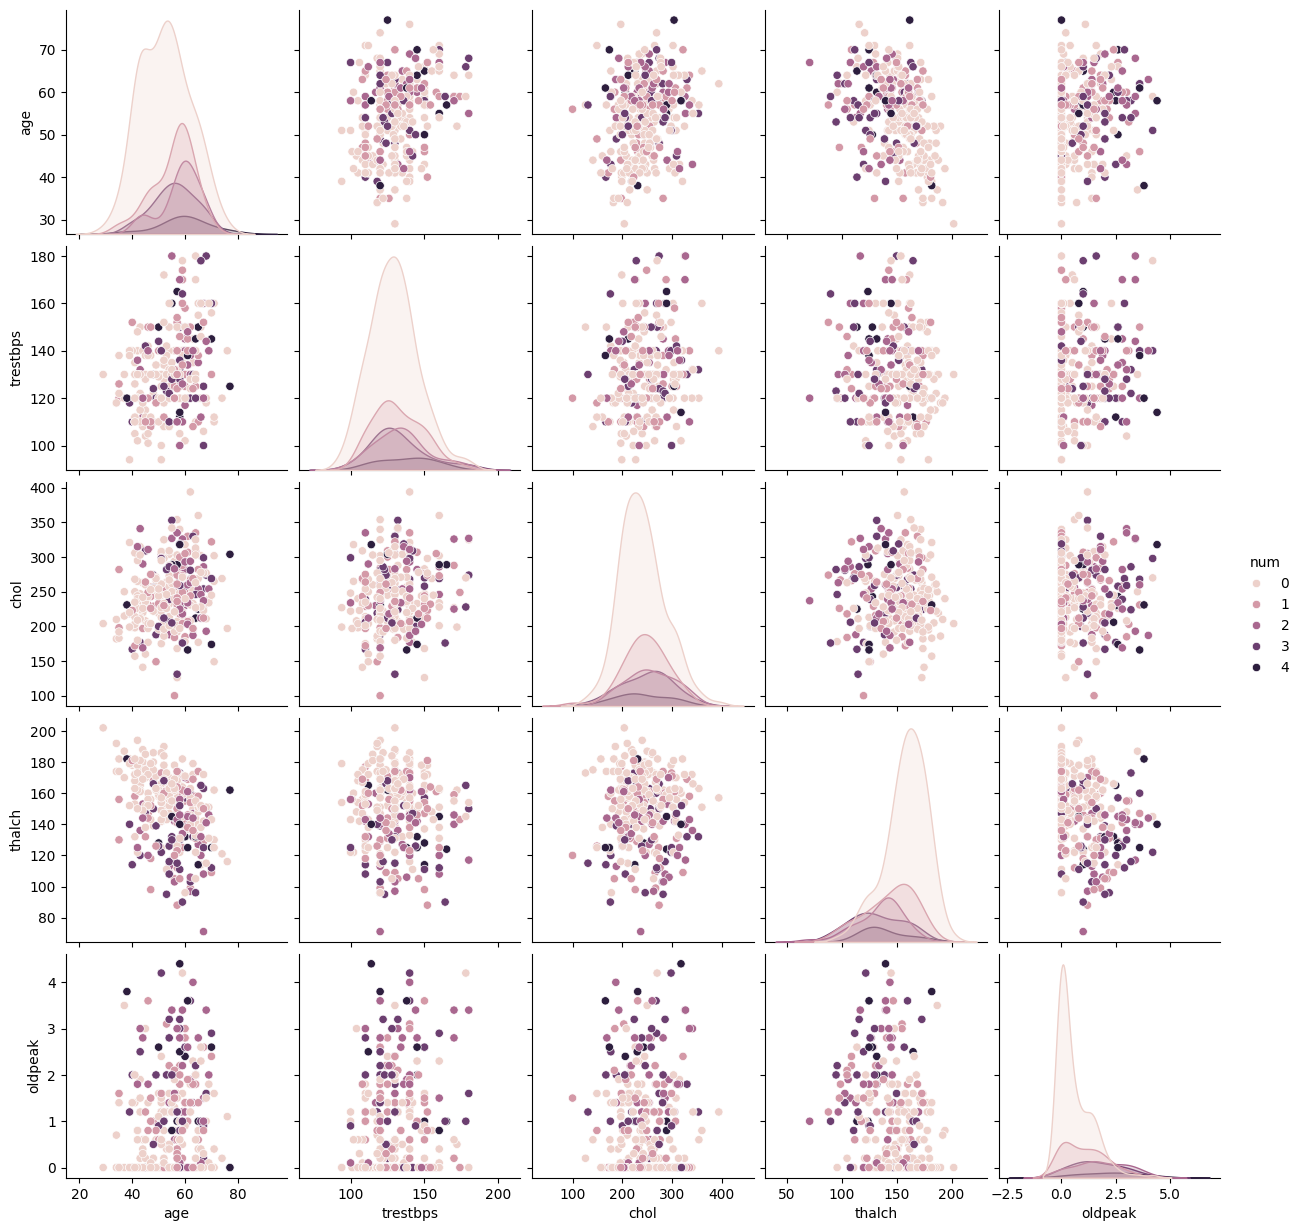

In [119]:
sns.pairplot(data=df, hue='num', vars=['age', 'trestbps', 'chol', 'thalch', 'oldpeak'])
plt.show()

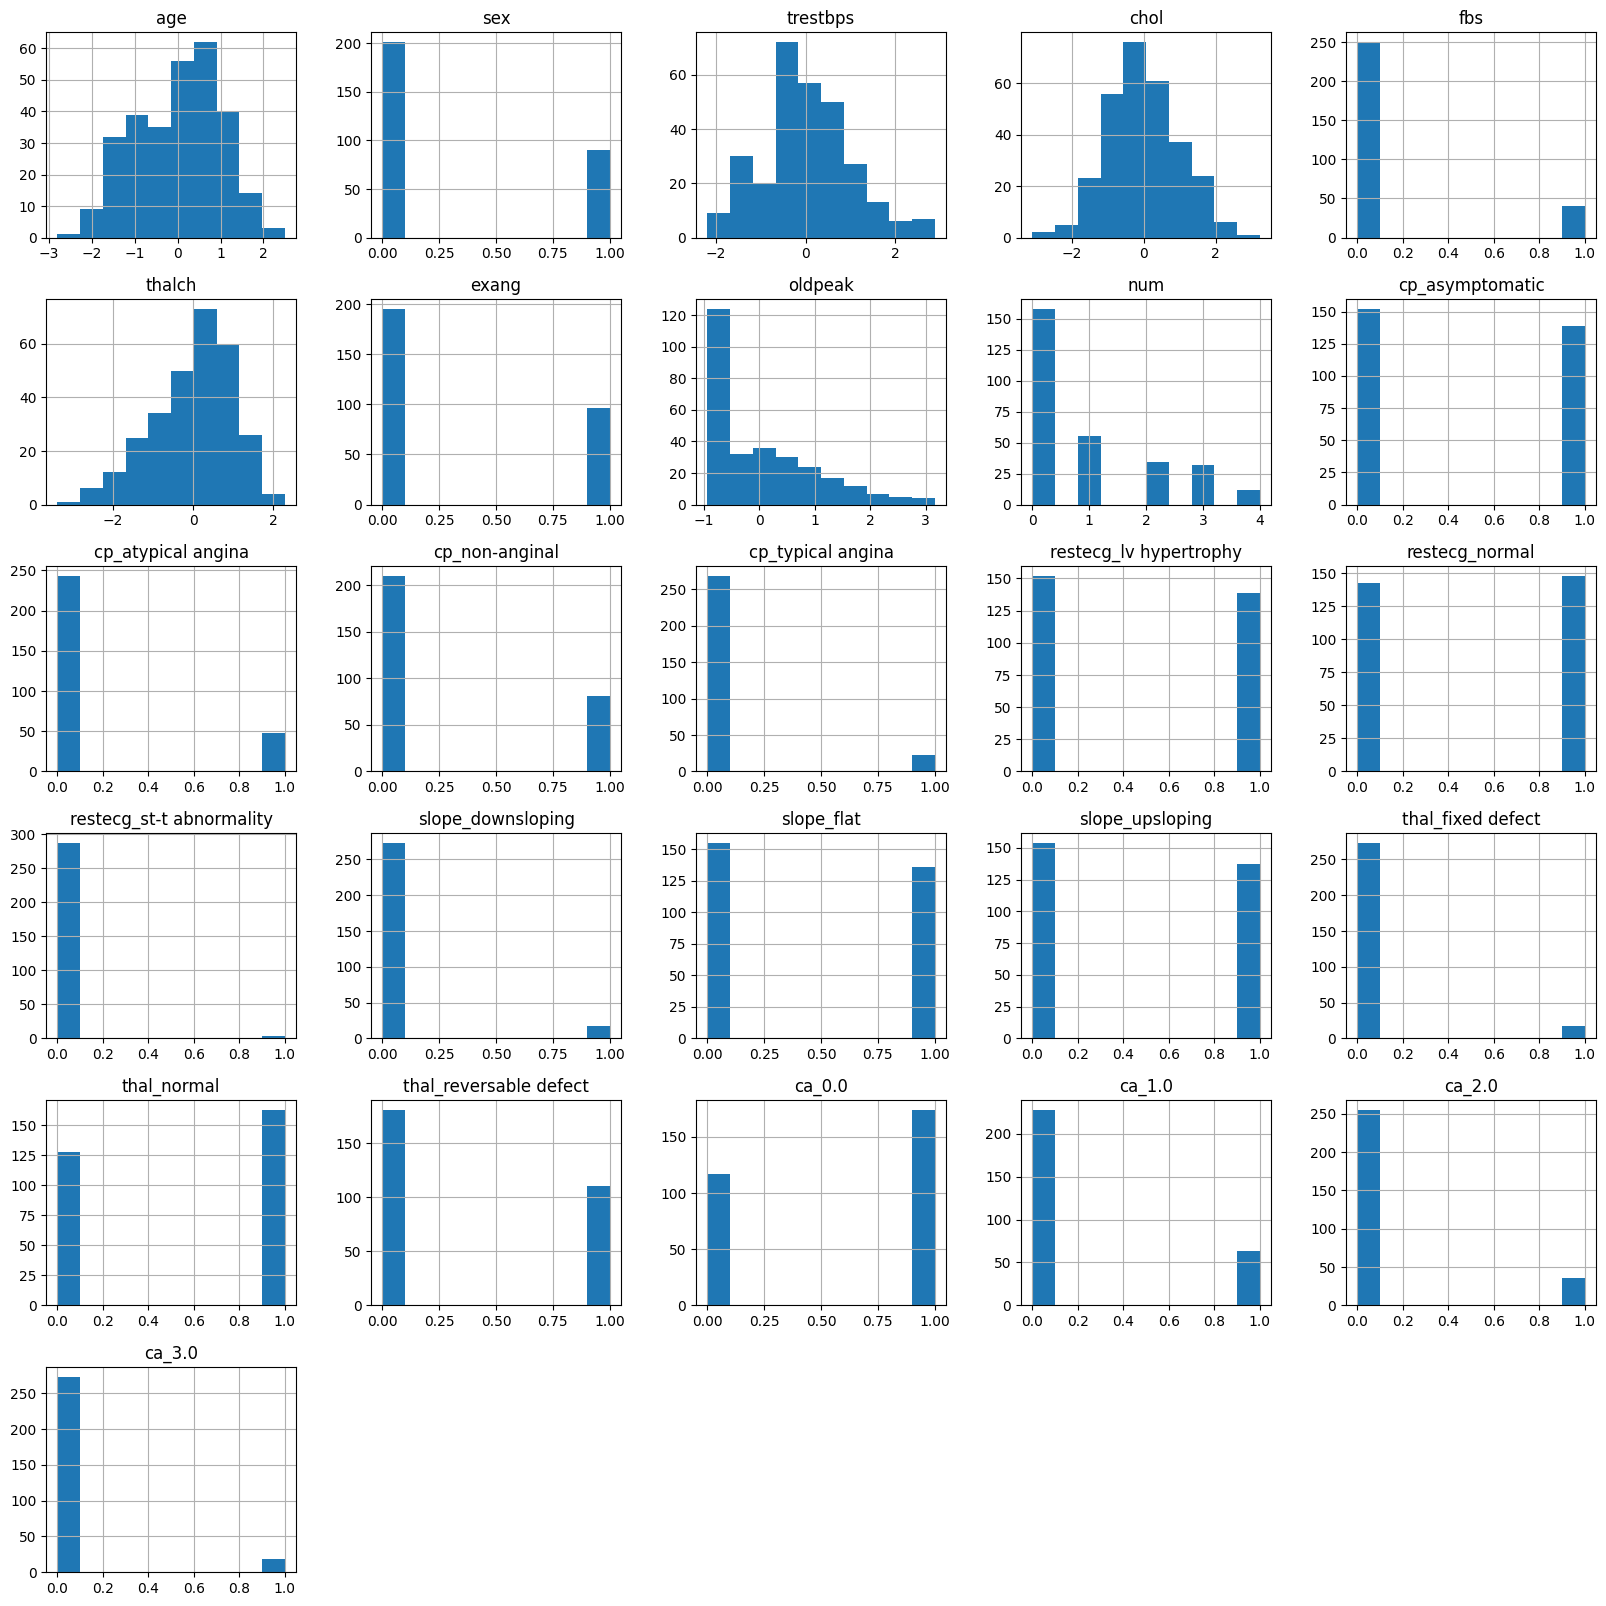

In [120]:
# Normalização dos dados
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df.hist(figsize=(20, 20))
plt.show()

Pelos histogramas, vemos que o StandardScale não muda a distribuição dos dados. Podemos ver também que a feature oldpeak não tem distribuição normal

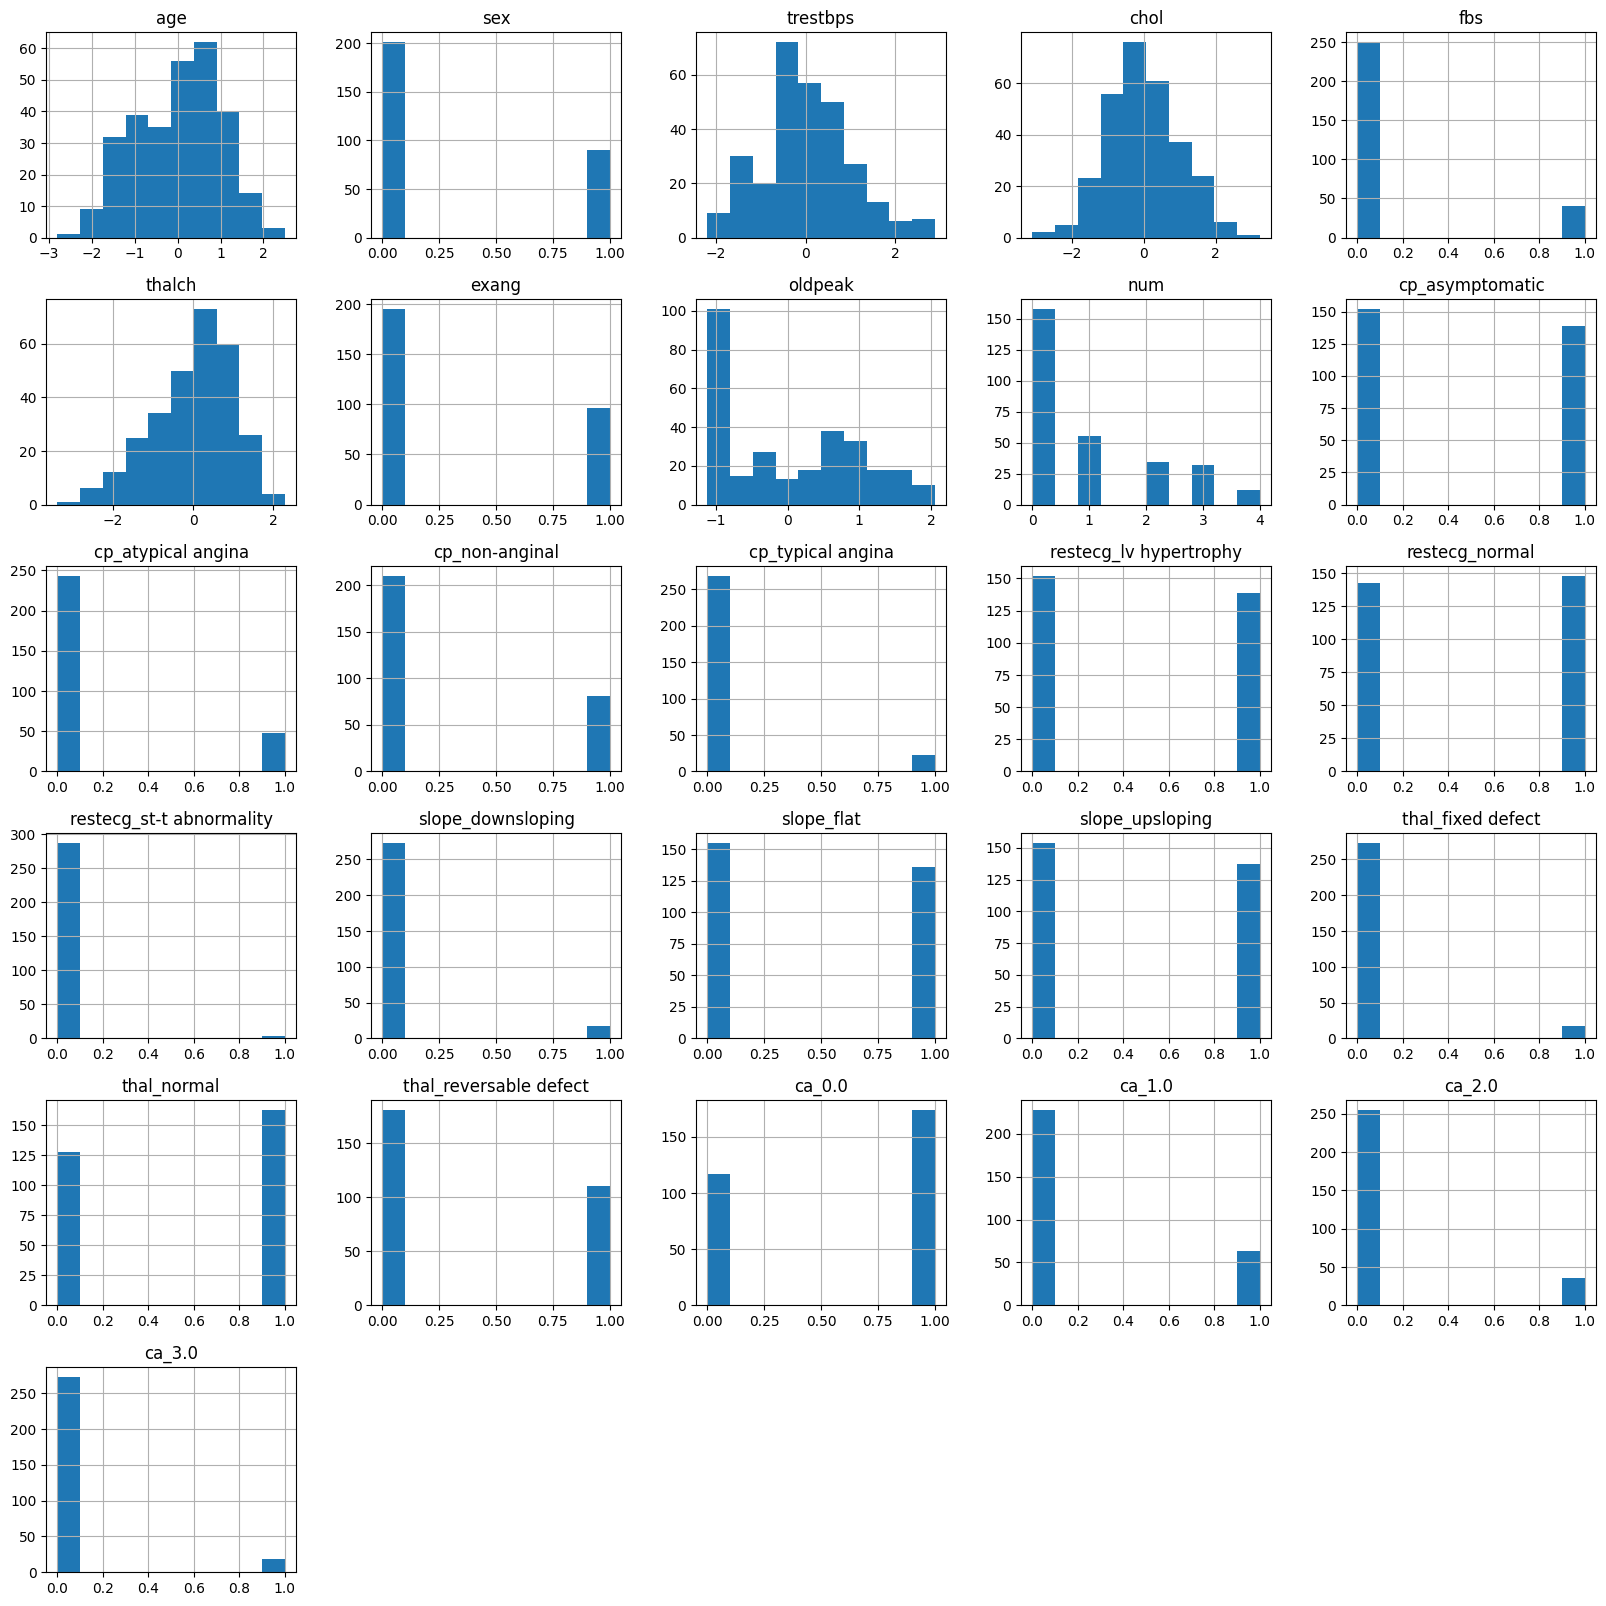

In [121]:
# Log transform
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
columns_to_normalize = ['oldpeak']
df[columns_to_normalize] = pt.fit_transform(df[columns_to_normalize].values)
df.hist(figsize=(20, 20))
plt.show()

# Dealing with text data

In [164]:
noticias = pd.read_csv('validation.csv').drop(columns=['id'])
noticias = noticias.head(20)

In [165]:
# printa o tamanho de cada notícia
print(noticias['article'].str.len())

# printa o número de palavras de cada notícia	
print(noticias['article'].str.split().str.len())

0     1566
1     3137
2     2798
3     3267
4     1955
5     5684
6     3741
7     3391
8     4433
9     3509
10    9597
11    2899
12    2307
13    3040
14    3222
15    5091
16    3497
17    4950
18    3730
19    3101
Name: article, dtype: int64
0      264
1      551
2      465
3      580
4      338
5      955
6      624
7      585
8      779
9      621
10    1659
11     482
12     406
13     551
14     562
15     835
16     572
17     863
18     612
19     536
Name: article, dtype: int64


In [176]:
# Conta quantas vezes uma palavra aparece em cada notícia
from sklearn.feature_extraction.text import CountVectorizer

# create the vectorizer
cv = CountVectorizer(min_df=0.2, max_df=0.9)

# fit the vectorizer
cv.fit(noticias['article'])

# print feature names
print(cv.get_feature_names_out())

# Tranforma o texto em um array
cv_transformed = cv.transform(noticias['article'])
cv_array = cv_transformed.toarray()
cv_array

['000' '10' '11' '14' '20' 'about' 'according' 'after' 'again' 'against'
 'ago' 'all' 'along' 'already' 'also' 'although' 'an' 'another' 'any'
 'appeared' 'are' 'around' 'as' 'australia' 'authorities' 'away' 'back'
 'be' 'because' 'been' 'before' 'being' 'believe' 'believed' 'best' 'big'
 'body' 'boss' 'both' 'boy' 'but' 'by' 'called' 'came' 'campaign' 'can'
 'city' 'come' 'coming' 'could' 'course' 'day' 'days' 'death' 'despite'
 'did' 'died' 'do' 'don' 'down' 'during' 'each' 'end' 'ended' 'even'
 'ever' 'every' 'face' 'female' 'final' 'first' 'following' 'former'
 'found' 'four' 'further' 'game' 'getting' 'girls' 'go' 'going' 'good'
 'got' 'great' 'ground' 'had' 'hard' 'has' 'have' 'he' 'health' 'her'
 'here' 'herself' 'high' 'him' 'his' 'hit' 'home' 'how' 'if' 'including'
 'injured' 'into' 'is' 'isn' 'its' 'january' 'job' 'just' 'know' 'last'
 'later' 'left' 'let' 'life' 'like' 'long' 'look' 'looked' 'looking'
 'looks' 'lot' 'made' 'make' 'making' 'man' 'many' 'mark' 'me' 'men'
 'mon

array([[0, 0, 0, ..., 0, 0, 1],
       [1, 2, 0, ..., 2, 0, 2],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 2, 1, 0],
       [0, 0, 0, ..., 1, 0, 2]], dtype=int64)

In [175]:
# Cria um dataframe com as contagens de cada palavra
cv_df = pd.DataFrame(cv_array, columns=cv.get_feature_names_out()).add_prefix('Contagem_')
cv_df

,Contagem_000,Contagem_10,Contagem_11,Contagem_14,Contagem_20,Contagem_about,Contagem_according,Contagem_after,Contagem_again,Contagem_against,...,Contagem_with,Contagem_woman,Contagem_women,Contagem_work,Contagem_world,Contagem_would,Contagem_year,Contagem_years,Contagem_york,Contagem_you
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,2,0,0,0,2,1,0,0,0,...,2,0,0,0,0,0,0,2,0,2
2,1,0,1,0,1,0,0,2,0,0,...,5,0,0,0,0,2,1,0,0,0
3,0,1,0,0,1,0,0,1,0,1,...,6,0,0,0,3,0,2,0,0,0
4,0,1,0,0,0,1,0,3,0,0,...,5,0,0,1,0,0,3,0,0,0
5,2,0,1,1,0,0,0,8,1,2,...,16,0,0,1,0,1,5,1,0,0
6,1,0,0,2,2,0,2,1,0,0,...,1,9,0,0,4,0,7,2,0,0
7,0,0,0,0,0,1,0,1,0,1,...,5,2,3,1,2,1,0,0,0,11
8,1,0,2,4,0,1,0,5,1,2,...,7,0,1,2,0,0,2,2,0,3
9,0,0,0,0,0,0,0,2,0,0,...,11,0,0,0,0,2,1,0,0,2


In [179]:
# import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# create the vectorizer
tv = TfidfVectorizer(max_features=100, stop_words='english')

# fit and transform the vectorizer
tv_transformed = tv.fit_transform(noticias['article'])

# create a DataFrame
tv_df = pd.DataFrame(tv_transformed.toarray(), columns=tv.get_feature_names_out()).add_prefix('TFIDF_').round(2)
tv_df

,TFIDF_000,TFIDF_14,TFIDF_according,TFIDF_american,TFIDF_authorities,TFIDF_body,TFIDF_bt,TFIDF_called,TFIDF_campaign,TFIDF_cancer,...,TFIDF_wang,TFIDF_wednesday,TFIDF_week,TFIDF_win,TFIDF_woman,TFIDF_women,TFIDF_world,TFIDF_year,TFIDF_years,TFIDF_zingano
0,0.00,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.11,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00
1,0.03,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.00
2,0.03,0.00,0.00,0.00,0.07,0.08,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.02,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.10,0.00,...,0.00,0.00,0.02,0.03,0.00,0.00,0.08,0.04,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.29,0.00,0.00
5,0.05,0.03,0.00,0.00,0.00,0.00,0.00,0.03,0.07,0.00,...,0.00,0.13,0.00,0.03,0.00,0.00,0.00,0.09,0.03,0.00
6,0.04,0.10,0.09,0.00,0.05,0.00,0.00,0.00,0.00,0.65,...,0.00,0.00,0.00,0.00,0.48,0.00,0.16,0.21,0.08,0.00
7,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.04,0.00,0.00,...,0.00,0.00,0.03,0.00,0.10,0.12,0.07,0.00,0.00,0.00
8,0.02,0.11,0.00,0.00,0.00,0.00,0.46,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.03,0.05,0.54
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.16,0.08,0.27,0.00,0.00,0.00,0.03,0.00,0.00


In [182]:
# printa as 5 palavras mais importantes da primeira notícia
noticia1 = tv_df.iloc[0]
print(noticia1.sort_values(ascending=False).head(5))

TFIDF_forrest    0.95
TFIDF_hard       0.16
TFIDF_died       0.16
TFIDF_cancer     0.11
TFIDF_michael    0.09
Name: 0, dtype: float64


In [184]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate a trigram vectorizer
cv_trigram_vec = CountVectorizer(max_features=100, 
                                 stop_words='english', 
                                 ngram_range = (3,3))

# Fit and apply trigram vectorizer
cv_trigram = cv_trigram_vec.fit_transform(noticias['article'])

# Print the trigram features
print(cv_trigram_vec.get_feature_names_out())

['21 year old' '26 year old' 'according world health'
 'accused anti semitism' 'acting like usual'
 'advertising standards authority' 'adverts germanwings slogan'
 'agency new cancer' 'airbus a320 carrying' 'alan stone 50'
 'andreas lubitz locked' 'anthropological team university'
 'aristocrat elephantine country' 'avid rugby fan'
 'background casually acting' 'bones woman lived' 'choice said michael'
 'clinic brodie smith' 'coach stuart lancaster' 'continued showy display'
 'country southernmost town' 'daily mail online' 'day death period'
 'dead man mother' 'deadliest catch season' 'death period mourning'
 'debut split decision' 'decision victory raquel'
 'deliberately forcing plane' 'delphi cto jeff'
 'descend french prosecutors' 'developed delphi automotive'
 'egyptian woman aristocrat' 'elephantine country southernmost'
 'estimated 14 million' 'exposed range driving' 'extended leg outward'
 'fourth line throne' 'francisco new york' 'free series premiere'
 'french prosecutors revea

In [186]:
# Create a DataFrame of the features
cv_tri_df = pd.DataFrame(cv_trigram.toarray(), 
                         columns=cv_trigram_vec.get_feature_names_out()).add_prefix('Counts_')

# Print the top 5 words in the sorted output
print(cv_tri_df.sum().sort_values(ascending=False).head())

Counts_prime member exclusive       5
Counts_daily mail online            5
Counts_kelly lynn miller            4
Counts_team university jaen         4
Counts_country southernmost town    3
dtype: int64
